# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

Found 259 images belonging to 3 classes.
Found 63 images belonging to 3 classes.
Class indices: {'Kobe Bryant': 0, 'Maria Sharapova': 1, 'Ronaldo': 2}


<Figure size 3000x400 with 0 Axes>

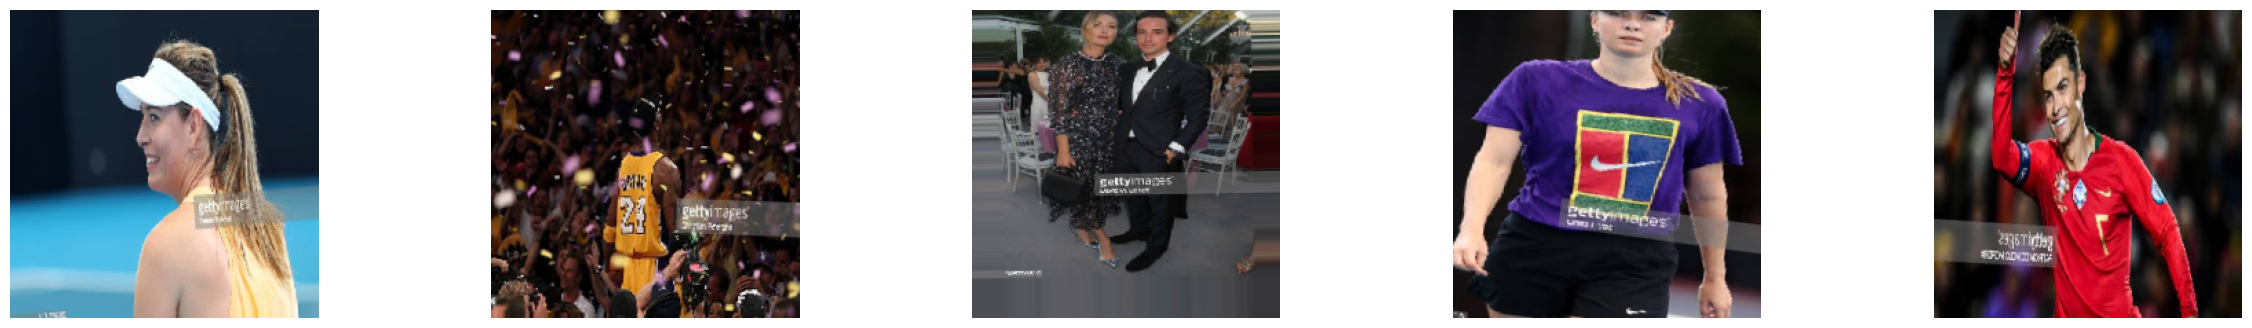

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers

base_dir = "IA/data_images"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

print("Class indices:", train_generator.class_indices)

plt.figure(figsize=(30, 4))
f, axarr = plt.subplots(1, 5, figsize=(30, 4))

for i in range(5):
    images, labels = next(train_generator)
    axarr[i].imshow(images[0])
    axarr[i].axis("off")

plt.show()

<Figure size 640x480 with 0 Axes>

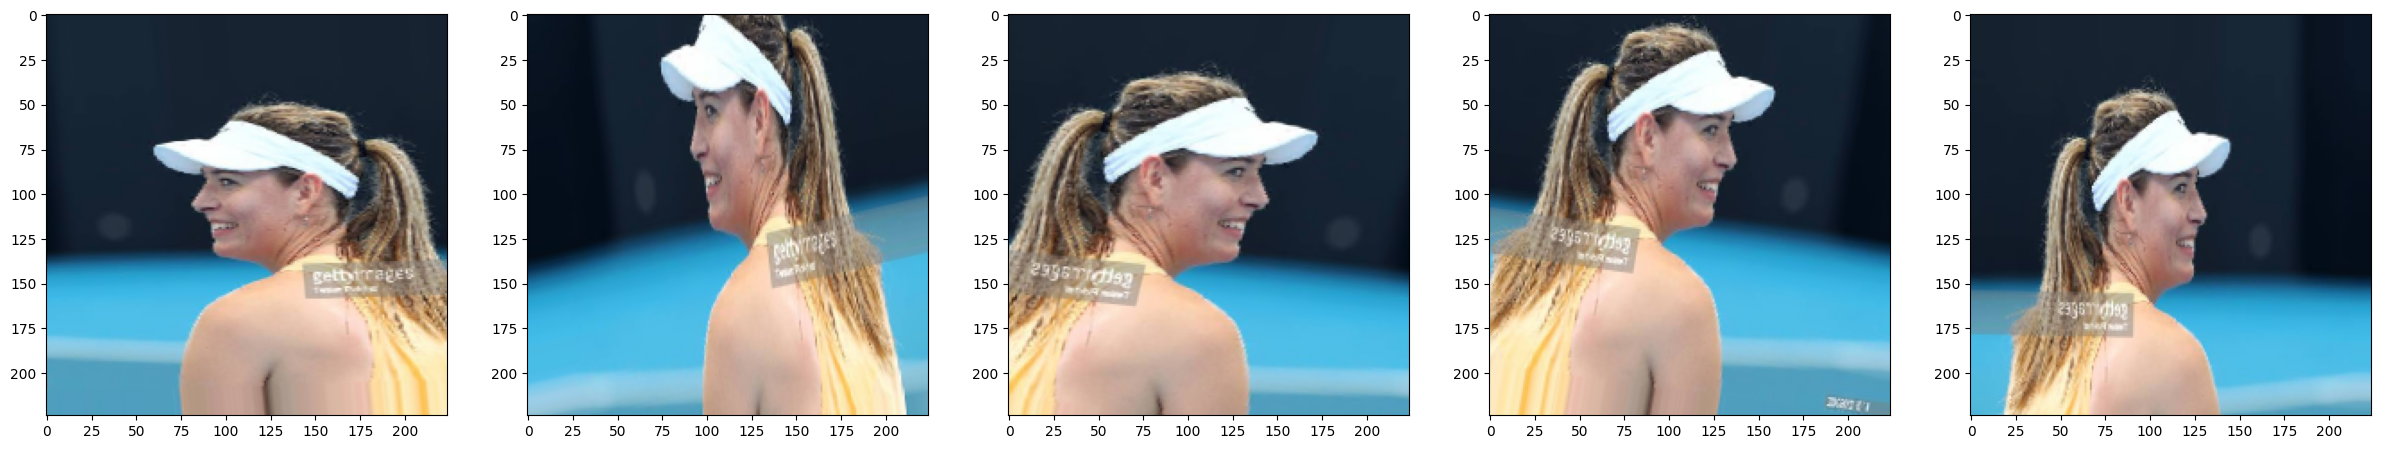

In [30]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

(8, 224, 224, 3)
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


<Figure size 640x480 with 0 Axes>

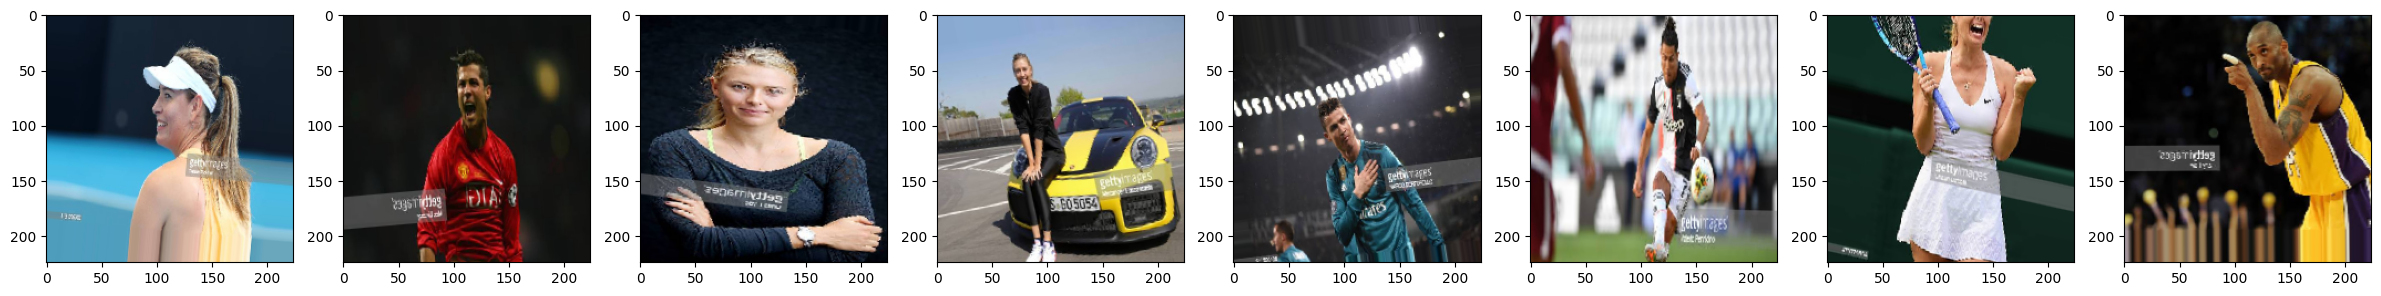

In [31]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [32]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape = (224,224,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))


model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['accuracy'])


/Users/randuretana/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │       259,587 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,835 (1.35 MB)

 Trainable params: 352,835 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
import os

print("Classes detected:", os.listdir("IA/data_images"))

Classes detected: ['.DS_Store', 'Maria Sharapova', 'Ronaldo', 'Kobe Bryant']


In [ ]:
history = model.fit(
	train_generator,
	epochs=150,
)

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

Epoch 1/150


/Users/randuretana/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/33 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.3048 - loss: 1.1137

In [ ]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical',
		  shuffle=True
)

model.evaluate(test_generator)



Found 322 images belonging to 3 classes.


/Users/randuretana/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.7635 - loss: 59.2993


[59.12697219848633, 0.7515528202056885]

In [ ]:
test_imgs = test_generator[0][0]
test_labels = test_generator[0][1]


predictions = model.predict(test_imgs)
classes_x = np.argmax(predictions,axis=1)
classes_x

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1,
       2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0,
       0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2])

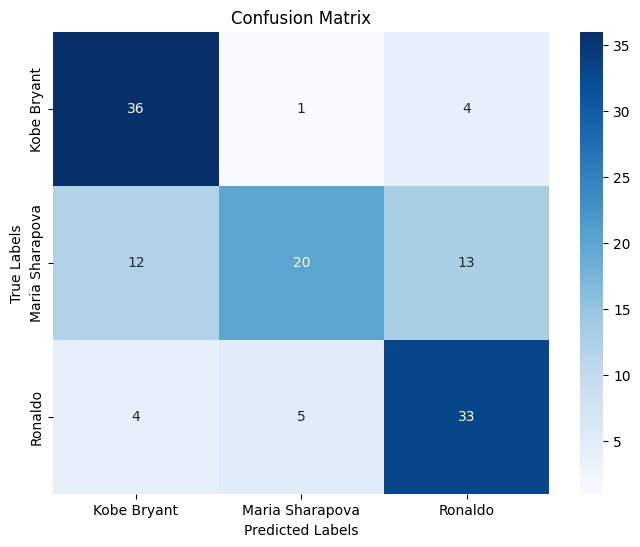

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = np.argmax(test_labels, axis=1)

predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_generator.class_indices.keys()),
            yticklabels=list(train_generator.class_indices.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
